# Lab 05 - Power Spectral Density, Noise, and Symbol Timing Information

### Maurice Woods

### 7 March 2017


------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------
## EC 01 - showpsd Python Function

In [1]:
from pylab import *
import ecen4652 as ecen
import showfun
import quick
import pamfun
import ptfun

##### Part A.) - Add the showpsd function to the showfun module

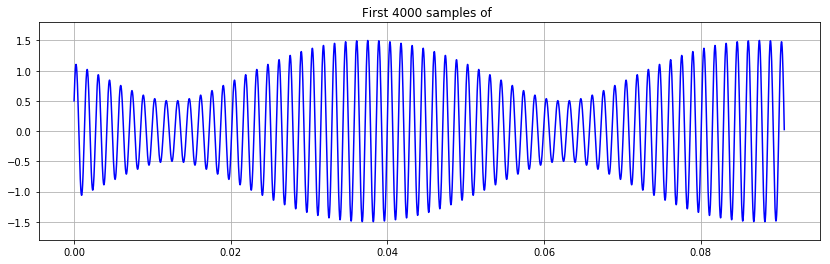

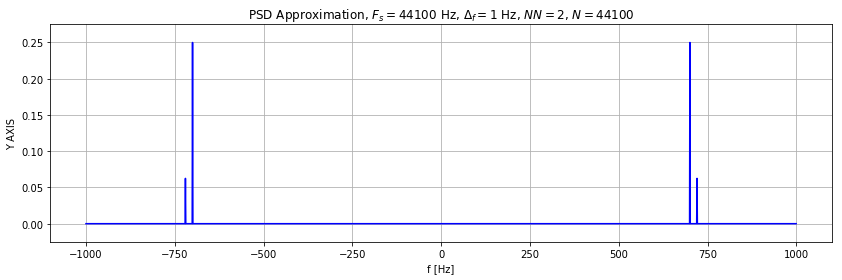

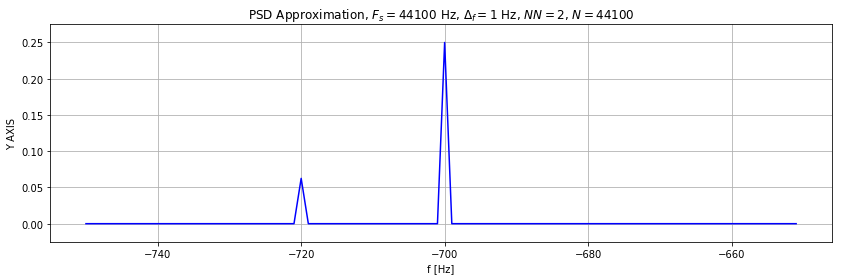

In [2]:
Fs = 44100 # Sampling rate
f1 = 700 # Test frequency 1
f2 = 720 # Test frequency 1
tlen = 2 # Duration in seconds
tt = arange(round(tlen*Fs))/float(Fs) # Time axis

x1t = sin(2*pi*f1*tt) # Sine with freq f1
x2t = 0.5*cos(2*pi*f2*tt) # Attenuated cosine with freq f2
sig_xt = ecen.sigWave(x1t+x2t, Fs, 0) # Combined sinusoidal signal
xtt = quick.quicktt(sig_xt.sig,Fs)
quick.quickplot(xtt,sig_xt.sig,'-b',[],[],'','','','',['first',4000])

showfun.showpsd0(sig_xt,[-1000, 1000, 0],Fs) #Plot S_x(f)
showfun.showpsd0(sig_xt,[-750, -650, 0],Fs) #Plot S_x(f)

Question

> Answer

##### Part B.) - Add a feature to showpsd so that it displays the total power in the title of the plots

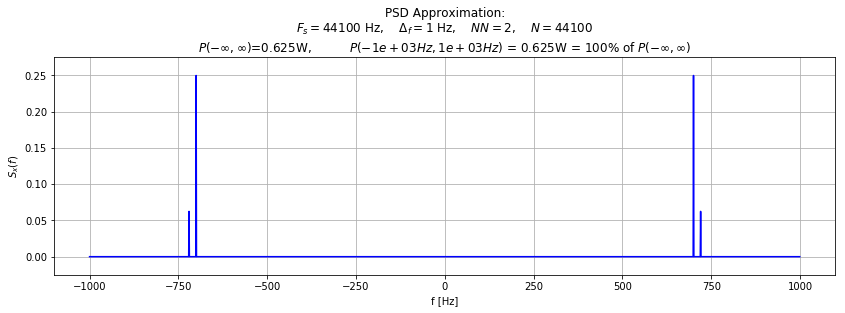

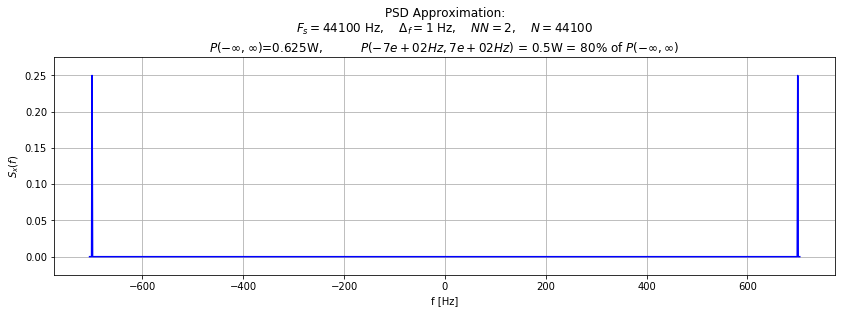

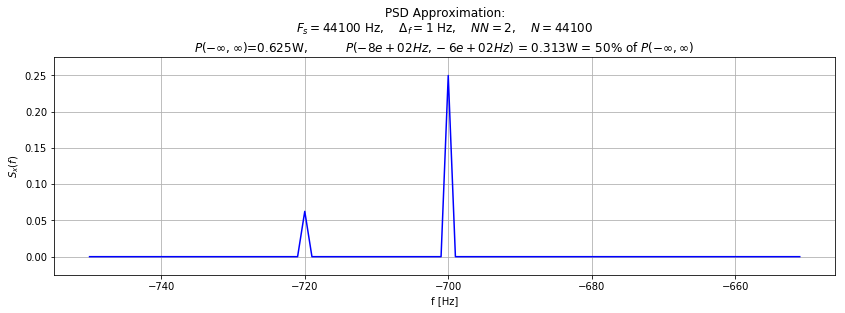

In [3]:
showfun.showpsd1(sig_xt,[-1000, 1000, 0],Fs) #Plot S_x(f)
showfun.showpsd1(sig_xt,[-705, 705, 0],Fs) #Plot S_x(f)
showfun.showpsd1(sig_xt,[-750, -650, 0],Fs) #Plot S_x(f)

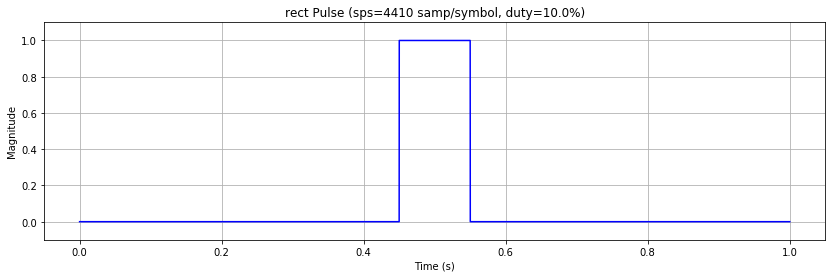

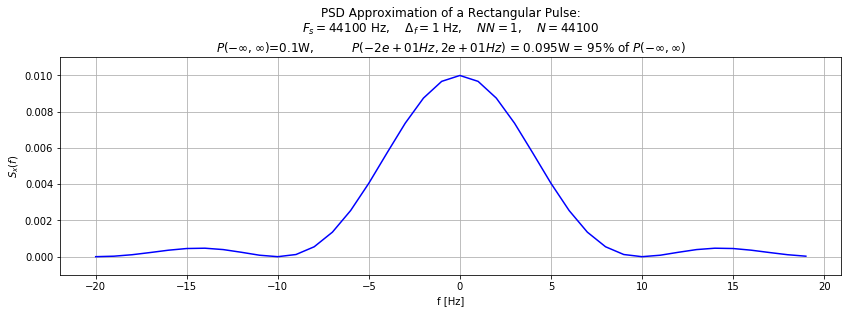

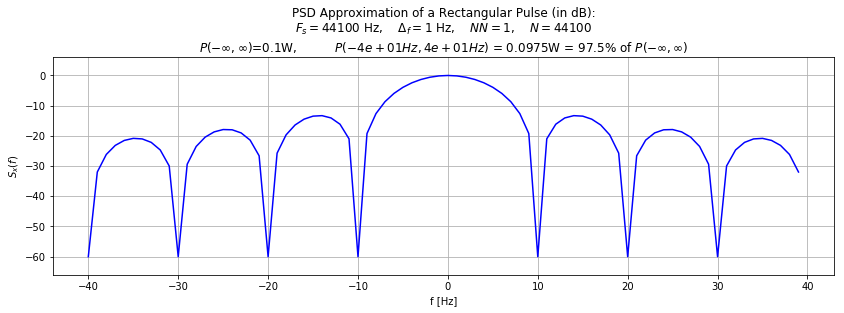

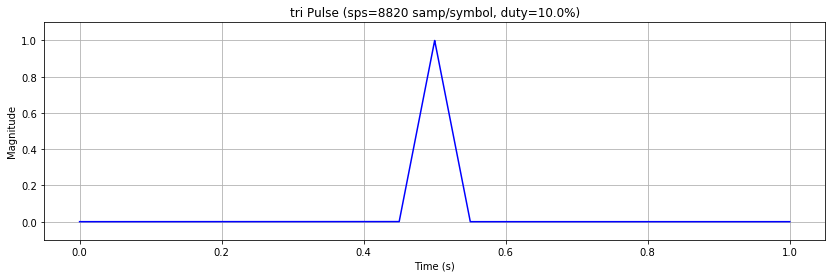

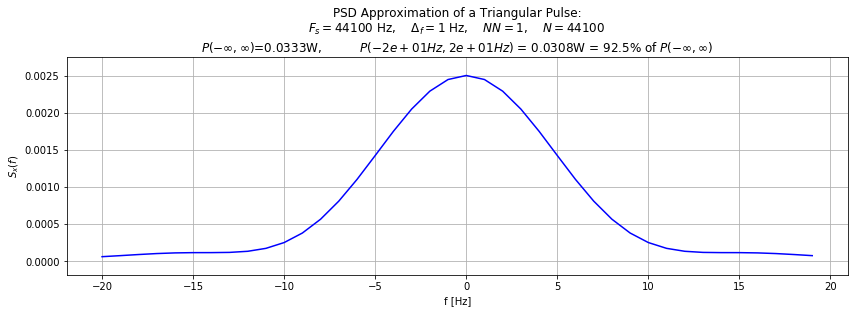

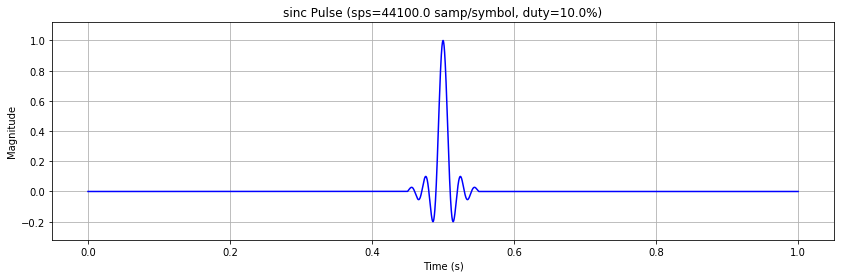

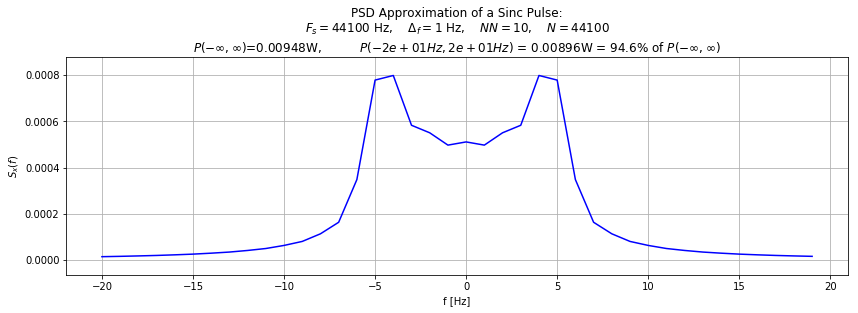

/home/maurice/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab05/ptfun.py:47: RuntimeWarning: divide by zero encountered in true_divide
  rcft = divide(rcft_num,float(rcft_den))
/home/maurice/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab05/ptfun.py:47: RuntimeWarning: invalid value encountered in true_divide
  rcft = divide(rcft_num,float(rcft_den))


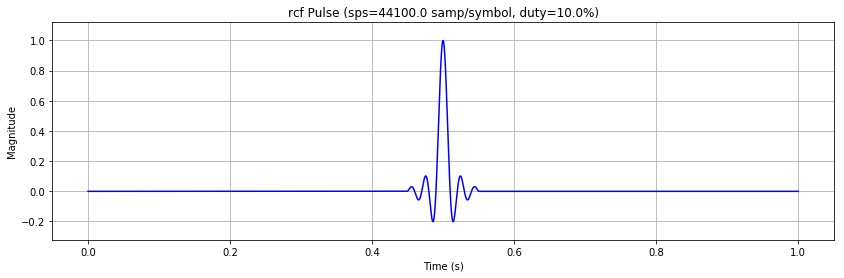

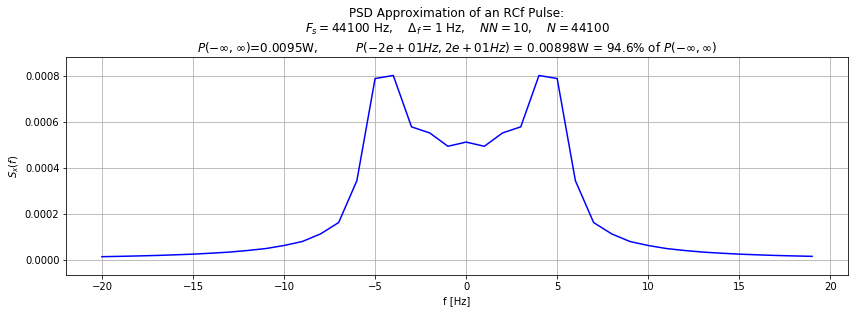

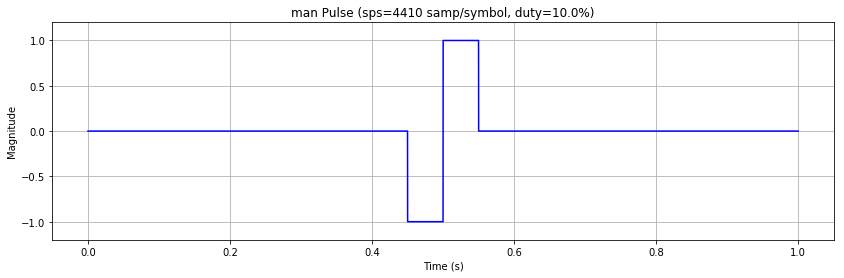

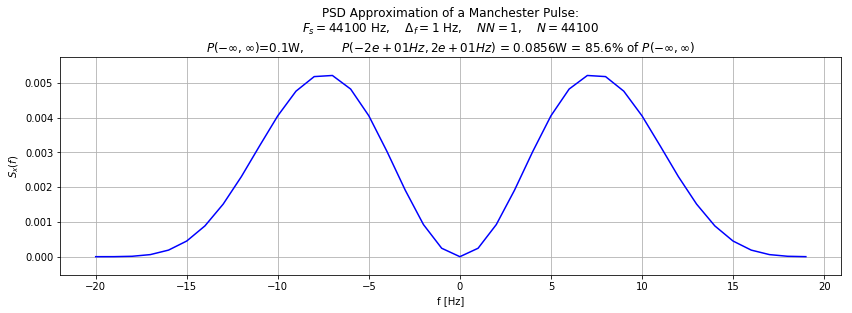

In [4]:
Fs = 44100
FB = 100
sps = int(Fs*0.1)
N = Fs

sig_xt = ptfun.pampt(sps,'rect',[],'plotpulse',0.1)
sig_xt = ecen.sigWave(sig_xt, Fs, 0)
showfun.showpsd1(sig_xt,[-20, 20, 0],N,'a Rectangular Pulse') #Plot S_x(f)
showfun.showpsd1(sig_xt,[-40, 40, -60],Fs,'a Rectangular Pulse (in dB)')   # Plot S_x(f)

sig_xt = ptfun.pampt(sps,'tri',[],'plotpulse',0.1)
sig_xt = ecen.sigWave(sig_xt, Fs, 0)
showfun.showpsd1(sig_xt,[-20, 20, 0],N,'a Triangular Pulse') #Plot S_x(f)

sig_xt = ptfun.pampt(sps,'sinc',[5,2.6],'plotpulse',0.1)
sig_xt = ecen.sigWave(sig_xt, Fs, 0)
showfun.showpsd1(sig_xt,[-20, 20, 0],N,'a Sinc Pulse') #Plot S_x(f)

sig_xt = ptfun.pampt(sps,'rcf',[5,0.2],'plotpulse',0.1)
sig_xt = ecen.sigWave(sig_xt, Fs, 0)
showfun.showpsd1(sig_xt,[-20, 20, 0],N,'an RCf Pulse') #Plot S_x(f)

sig_xt = ptfun.pampt(sps,'man',[],'plotpulse',0.1)
sig_xt = ecen.sigWave(sig_xt, Fs, 0)
showfun.showpsd1(sig_xt,[-20, 20, -0],N,'a Manchester Pulse') #Plot S_x(f)

Question

> Answer

##### Part C.) - Generate about 5 sec of random binary polar PAM signals with rectangular, triangular, and sinc pulses

Rectangular pulse created but not plotted...


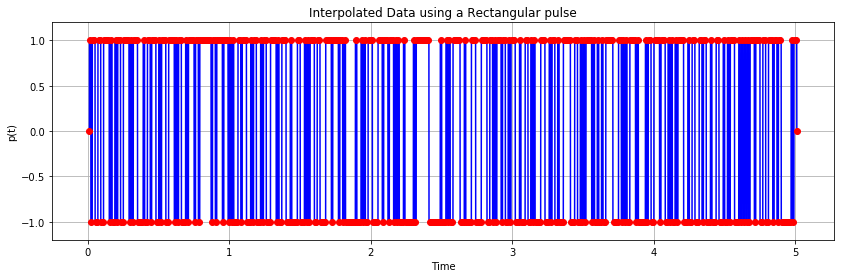

Tritangular pulse created but not plotted...


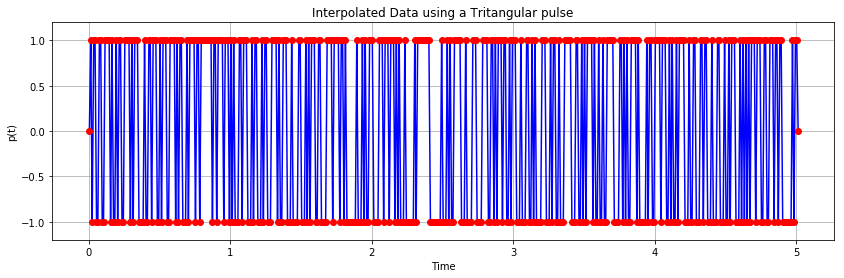

Sinc pulse created but not plotted...


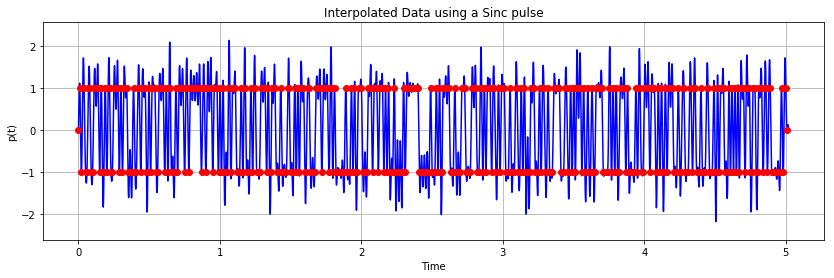

In [5]:
FB = 100 # bits per sec
t = 5 # seconds
N = t*FB # data points
dn = around(rand(N)) # random unipolar binary signal
an = ((dn*2)-1).astype(int) #polar binary
an = concatenate([[0],an,[0]])
sig_an = ecen.sigSequ(an,FB)

intrp_an_rect = pamfun.pam11(sig_an, Fs, 'rect',[],['nopulse'])
intrp_an_tri  = pamfun.pam11(sig_an, Fs, 'tri' ,[],['nopulse'])
intrp_an_sinc = pamfun.pam11(sig_an, Fs, 'sinc',[20,0],['nopulse'])

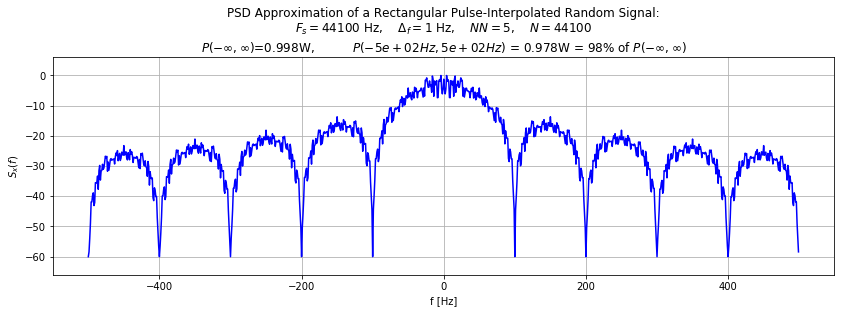

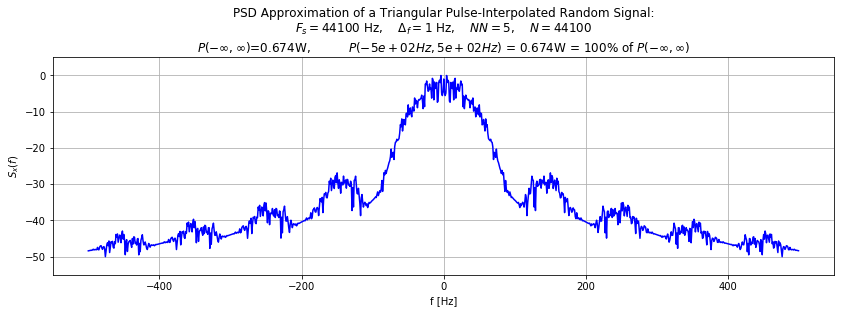

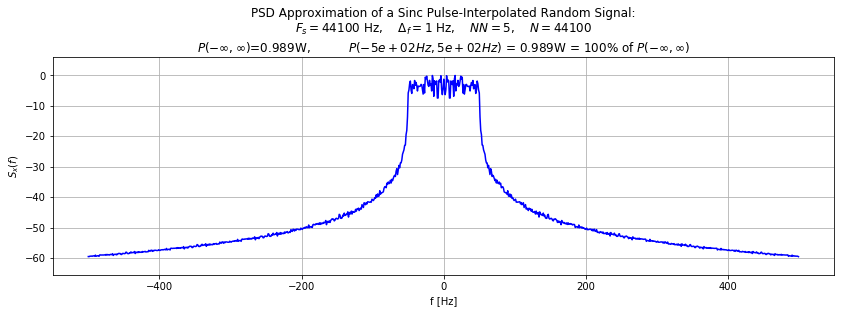

In [6]:
sig_intrp_an_rect = ecen.sigWave(intrp_an_rect.sig, Fs, 0) #
sig_intrp_an_tri  = ecen.sigWave(intrp_an_tri.sig,  Fs, 0) #
sig_intrp_an_sinc = ecen.sigWave(intrp_an_sinc.sig, Fs, 0) #
showfun.showpsd1(sig_intrp_an_rect,[-500, 500, -60],Fs,'a Rectangular Pulse-Interpolated Random Signal') #Plot S_x(f)
showfun.showpsd1(sig_intrp_an_tri,[-500, 500, -60],Fs,'a Triangular Pulse-Interpolated Random Signal') #Plot S_x(f)
showfun.showpsd1(sig_intrp_an_sinc,[-500, 500, -60],Fs,'a Sinc Pulse-Interpolated Random Signal') #Plot S_x(f)

##### Part D.) - PSD and Measuring Power in GNU Radio

How much of the total signal power is contained in the bandwidths of the following PAM signals:

> ![1D.1](1_d_1.png)
> Answer
> 
> ![1D.2](1_d_2.png)
> Answer
> 
> ![1D.3](1_d_3.png)
> Answer
> 
> ![1D.4](1_d_4.png)
> Answer
> 
> ![1D.5](1_d_5.png)
> Answer

##### Part E.) - Power in Complex-Valued Waveforms

Question

> Answer

------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------
## EC 02 - Generating and Estimating Noise

##### Part A.) - Generate 5 sec of white Gaussian noise

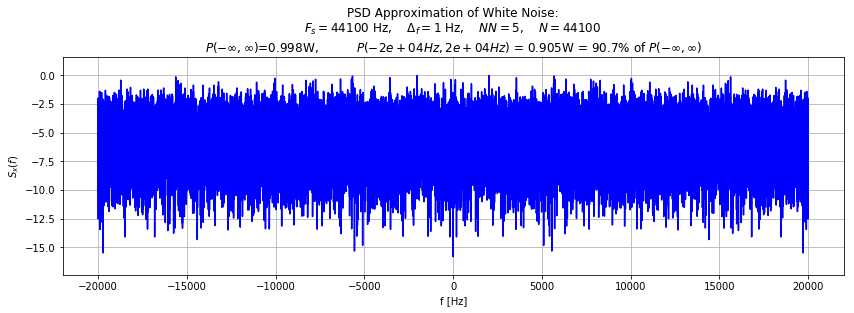

In [7]:
Fs = 44100 # Sampling
tlen = 5   # Duration
tt = arange(round(tlen*Fs))/float(Fs)
nt = randn(len(tt)) # Gaussian
sig_nt = ecen.sigWave(nt, Fs, tt[0])
#sig_nt = pamfun.pam11(sig_nt,Fs,'rcf',[20, 0.2]) #Bandlimited noise n(t), rate Fs
showfun.showpsd1(sig_nt,[-20000, 20000, -60],Fs,'White Noise') #Plot S_x(f)

/home/maurice/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab05/pamfun.py:177: RuntimeWarning: invalid value encountered in true_divide
  rcft = divide(rcft_num,float(rcft_den))


RCf pulse created but not plotted...


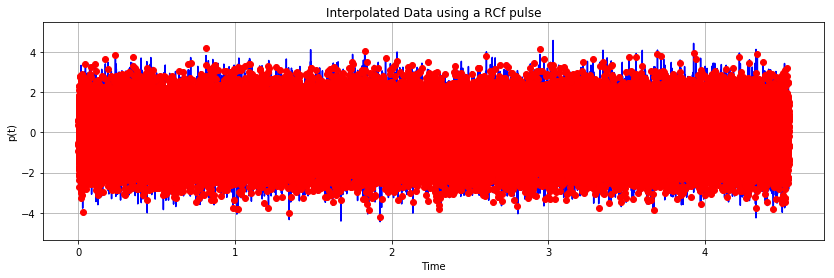

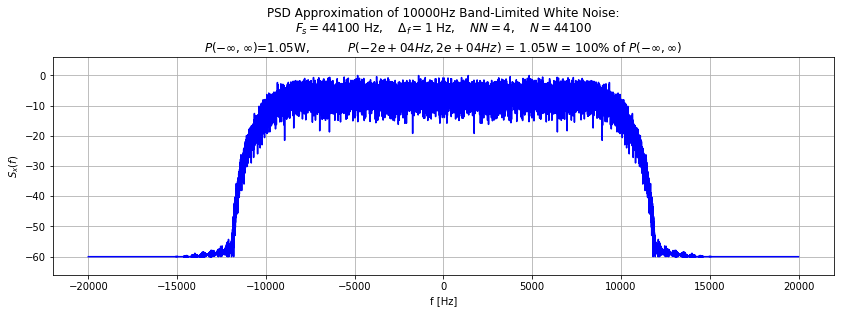

RCf pulse created but not plotted...


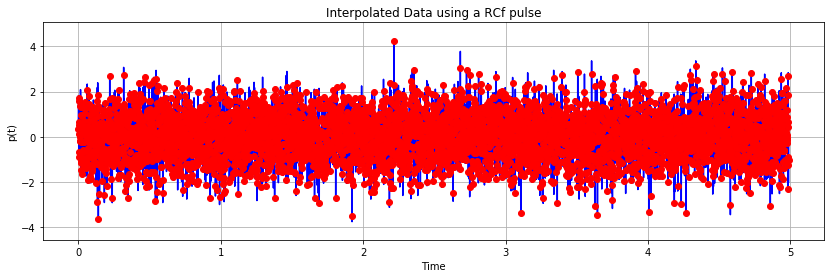

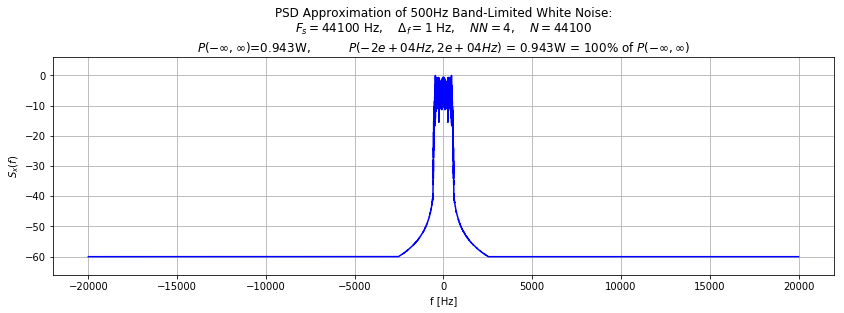

In [8]:
import ecen4652 as ecen
Fs = 44100 # Sampling rate
tlen = 5 # Duration in seconds

nfL = 10000 # Noise cutoff frequency
nn = randn(round(tlen*2*nfL)) # Gaussian noise, rate 2*nfL
sig_nn = ecen.sigSequ(nn, 2*nfL, 0)
sig_nt = pamfun.pam11(sig_nn,Fs,'rcf',[20, 0.2],['nopulse']) #Bandlimited noise n(t), rate Fs
showfun.showpsd1(sig_nt,[-20000, 20000, -60],Fs,str(nfL)+'Hz Band-Limited White Noise') #Plot S_x(f)

nfL = 500 # Noise cutoff frequency
nn = randn(round(tlen*2*nfL)) # Gaussian noise, rate 2*nfL
sig_nn = ecen.sigSequ(nn, 2*nfL, 0)
sig_nt = pamfun.pam11(sig_nn,Fs,'rcf',[20, 0.2],['nopulse']) #Bandlimited noise n(t), rate Fs
showfun.showpsd1(sig_nt,[-20000, 20000, -60],Fs,str(nfL)+'Hz Band-Limited White Noise') #Plot S_x(f)

#nfL = 10 # Noise cutoff frequency
#nn = randn(round(tlen*2*nfL)) # Gaussian noise, rate 2*nfL
#sig_nn = ecen.sigSequ(nn, 2*nfL, 0)
#sig_nt = pamfun.pam11(sig_nn,Fs,'rcf',[20, 0.2],['nopulse']) #Bandlimited noise n(t), rate Fs
#showfun.showpsd1(sig_nt,[-20000, 20000, -60],Fs,str(nfL)+'Hz Band-Limited White Noise') #Plot S_x(f)

Question 

> Answer

##### Part B.) - Generate a random polar binary PAM signal s(t) of length 2 sec with triangular p(t)

Tritangular pulse created but not plotted...
Supressing plotting result


/home/maurice/Documents/Git/CUBoulderMasters/2017spring/CommsLab/Lab05/pamfun.py:177: RuntimeWarning: invalid value encountered in true_divide
  rcft = divide(rcft_num,float(rcft_den))


RCf pulse created but not plotted...
Supressing plotting result


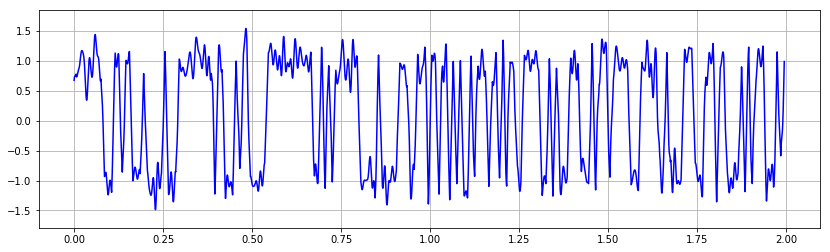

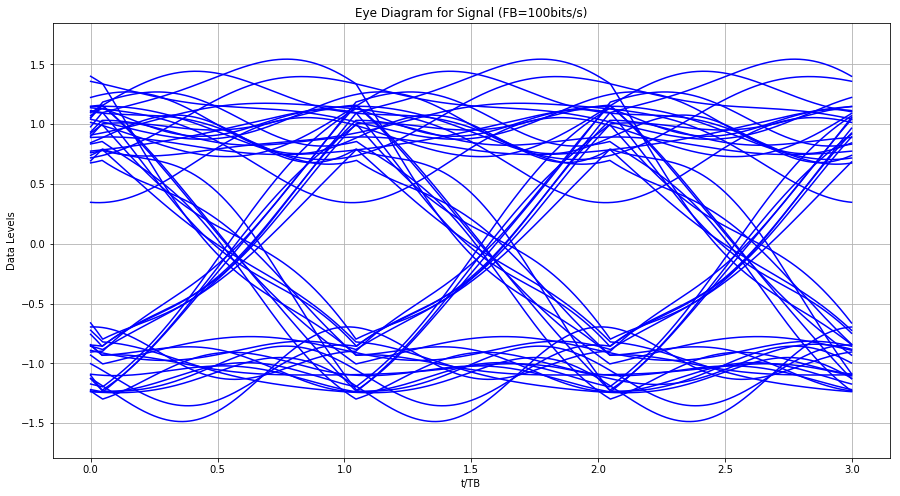

In [9]:
FB = 100
Fs = 44100
L = 2
st = pamfun.randompam(2,'tri')
nt = pamfun.whitenoise(2,FB)

A = 0.185
rt = st.sig[200:]+(A*nt.sig)
rt = ecen.sigWave(rt, Fs)

tt = quick.quicktt(rt.sig,Fs)
quick.quickplot(tt,rt.sig)

showfun.showeye(rt, FB, 50, [0.5, 3, -1.5*L, 1.5*L],'large')

Question

> Answer

##### Part C.) - PAM signal SNR estimation in GNU Radio

Question

> Answer

##### Part D.) - Complex-Valued Noise in GNU Radio

Question

> Answer